In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true","products")
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


1. visualizzare il numero di prodotti di cui non si conosce l'anno del modello

In [2]:
df["model_year"].isna().sum()

10

2. eliminare i prodotti del punto precedente dal dataframe

In [3]:
df = df.dropna()
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


3. contare i prodotti che sono stati presenteti (model_year) nel 2017

In [4]:
df[df["model_year"]==2017.0]["product_id"].count()

85

4. visualizzare i prodotti che hanno un category_id compreso tra 2 e 4 (estemi inclusi)

In [5]:
df[(df["category_id"] >= 2) & (df["category_id"] <= 4)]["product_name"]

9                             Surly Straggler - 2016
10                       Surly Straggler 650b - 2016
11                Electra Townie Original 21D - 2016
12                Electra Cruiser 1 (24-Inch) - 2016
13     Electra Girl's Hawaii 1 (16-inch) - 2015/2016
                           ...                      
309         Electra Townie Commute 27D Ladies - 2018
311         Electra Townie Commute 8D Ladies' - 2018
312         Electra Townie Original 1 Ladies' - 2018
313    Electra Townie Original 21D EQ Ladies' - 2018
314       Electra Townie Original 21D Ladies' - 2018
Name: product_name, Length: 114, dtype: object

5. visualizzare i prodotti che hanno la parola Trek nel nome

In [6]:
df[df["product_name"].str.contains("Trek")]["product_name"]

0                            Trek 820 - 2016
3                   Trek Fuel EX 8 29 - 2016
6                   Trek Slash 8 27.5 - 2016
7      Trek Remedy 29 Carbon Frameset - 2016
28                   Trek X-Caliber 8 - 2017
                       ...                  
316             Trek Checkpoint ALR 5 - 2019
317     Trek Checkpoint ALR 5 Women's - 2019
318      Trek Checkpoint SL 5 Women's - 2019
319              Trek Checkpoint SL 6 - 2019
320      Trek Checkpoint ALR Frameset - 2019
Name: product_name, Length: 131, dtype: object

6. visualizzare il numero di prodotti per ogni categoria (visualizzare il numero della categoria e il numero di prodotti)

In [7]:
df2 = df.groupby("category_id")["product_name"].count()
df2

category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_name, dtype: int64

7. visualizzare le categorie che hanno più di 50 prodotti visualizzare il numero della categoria e il numero di prodotti)

In [8]:
df2[df2.values > 50]

category_id
1    57
3    76
6    59
7    59
Name: product_name, dtype: int64

8. visualizzare uno stacked bar chart che riporti il numero di prodotti presentati per ogni anno in ogni categoria. Il grafico deve presentare sulle ascisse il numero della categoria e sulle ordinate il numero di prodotti, divisi per anno

In [45]:
df3 = df.groupby(["model_year","category_id"])["product_id"].count().unstack().reset_index()
df3
#df3.index.get_level_values(0)

category_id,model_year,1,2,3,4,5,6,7
0,2016.0,3.0,3.0,9.0,2.0,NaN,8.0,NaN
1,2017.0,19.0,10.0,19.0,2.0,2.0,21.0,12.0
2,2018.0,35.0,15.0,48.0,6.0,20.0,30.0,41.0
3,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0


<BarContainer object of 4 artists>

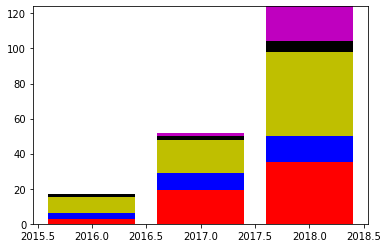

In [57]:
fig = plt.figure()
ax = plt.axes()
ax.bar(df3["model_year"],df3[1],color="r")
ax.bar(df3["model_year"],df3[2],bottom=df3[1],color="b")
ax.bar(df3["model_year"],df3[3],bottom=df3[1]+ df3[2],color="y")
ax.bar(df3["model_year"],df3[4],bottom=df3[1]+ df3[2]+df3[3],color="k")
ax.bar(df3["model_year"],df3[5],bottom=df3[1]+ df3[2]+df3[3]+df3[4],color="m")
ax.bar(df3["model_year"],df3[6],bottom=df3[1]+ df3[2]+df3[3]+df3[4]+df3[5],color="g")
ax.bar(df3["model_year"],df3[7],bottom=df3[1]+ df3[2]+df3[3]+df3[4]+df3[5]+df3[6],color="c")

9. visualizzare un pie chart che riporti in numero di prodotti presentati in ogni anno.

In [11]:
df4 = df.groupby("model_year")["product_id"].count()
df4

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_id, dtype: int64

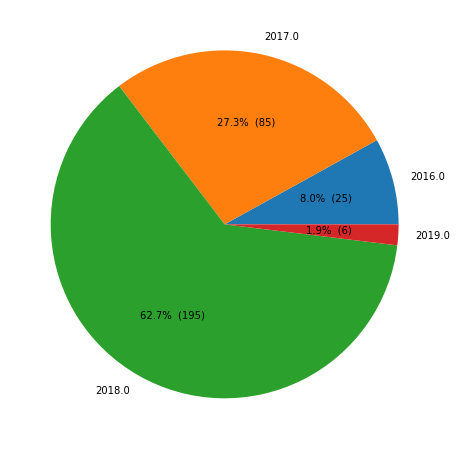

In [33]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.pie(df4.values,labels =df4.index,autopct=lambda x: '{:.1f}%  ({:,.0f})'.format(x,x * sum(df4.values)/100))
plt.show()

10. salvare in un file png i due grafici affiancati

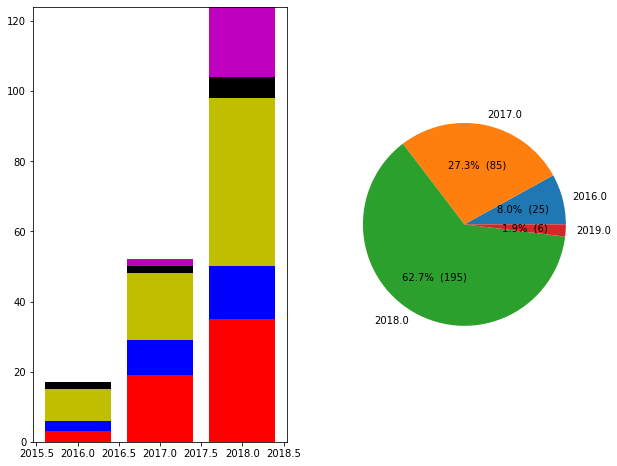

In [59]:
fig, (ax,ax2) = plt.subplots(1,2)
fig.set_size_inches(10,8)
ax.bar(df3["model_year"],df3[1],color="r")
ax.bar(df3["model_year"],df3[2],bottom=df3[1],color="b")
ax.bar(df3["model_year"],df3[3],bottom=df3[1]+ df3[2],color="y")
ax.bar(df3["model_year"],df3[4],bottom=df3[1]+ df3[2]+df3[3],color="k")
ax.bar(df3["model_year"],df3[5],bottom=df3[1]+ df3[2]+df3[3]+df3[4],color="m")
ax.bar(df3["model_year"],df3[6],bottom=df3[1]+ df3[2]+df3[3]+df3[4]+df3[5],color="g")
ax.bar(df3["model_year"],df3[7],bottom=df3[1]+ df3[2]+df3[3]+df3[4]+df3[5]+df3[6],color="c")
ax2.pie(df4.values,labels =df4.index,autopct=lambda x: '{:.1f}%  ({:,.0f})'.format(x,x * sum(df4.values)/100))
plt.show()

In [60]:
fig.savefig("grafici.png")